## Save Imagenet as pth


In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
import joblib
import numpy as np

In [6]:
load_pkl = False
split = 'val'

In [7]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

if load_pkl:

    # Load saved
    imagenet_data = joblib.load('imagenet_data'+split+'.pkl')
    # imagenet_data = torch.utils.data.Subset(imagenet_data, indices)
else:
    imagenet_data = torchvision.datasets.ImageNet('./data/ImageNet/', split=split, transform=transform)
    joblib.dump(imagenet_data, 'imagenet_data'+split+'.pkl')


length_imagenet = len(imagenet_data)

In [9]:
indices = np.arange(length_imagenet-1000, length_imagenet+1000)
imagenet_data_a = torch.utils.data.Subset(imagenet_data, indices)
length_imagenet = len(imagenet_data)
print(imagenet_data_a.indices, length_imagenet)



[49000 49001 49002 ... 50997 50998 50999] 50000


In [10]:
batch_size = 131072


torch.Size([3, 375, 500])


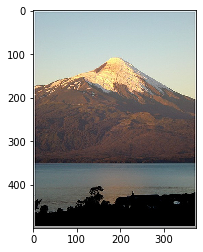

In [11]:
plt.imshow(imagenet_data_a[0][0].permute(1,2,0))


print(imagenet_data_a[1][0].shape)

## Create Imagenet Shape Vector and Save it
for fixing box sizes after inference


In [14]:
batch_size = 131072
index_array = np.append(np.arange(0, length_imagenet, batch_size), length_imagenet)

for i in range(len(index_array)-1):
    st = index_array[i]
    end = index_array[i+1]
    indices = np.arange(st, end)
    imagenet_data_a = torch.utils.data.Subset(imagenet_data, indices)
    
    shapes = []
    
    for i, (im, _) in enumerate(imagenet_data_a):
        shapes.append(im.numpy().shape[1:])
    
    shapes = np.array(shapes)
    np.savetxt('imagenet_shapes_'+split+'_'+str(st)+'_to_'+str(end)+'.csv',
                       shapes, fmt='%d',delimiter= ',')
    print('Saved image shapes starting between', st, 'and', end)

Saved image shapes starting between 0 and 50000


array([    0, 50000])